In [47]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

wine_data = load_wine()


X = wine_data.data  
y = wine_data.target  

wine_df = pd.DataFrame(X, columns=wine_data.feature_names)

print(wine_df.head())
wine_df.shape

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

(178, 13)

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wine_df = pd.DataFrame(X_scaled, columns=wine_data.feature_names)

print(wine_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [36]:
pca = PCA(n_components= 10)
pca.fit(X_scaled)

PCA(n_components=10)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1000, stratify=y)# Blocca le proporzioni tra output y
gb_classifier = GradientBoostingClassifier(random_state=42) # Usa tanti alberi decisionali ottimizzati con gradiente come funzione di perdita per creare albero forte

In [65]:
cv = StratifiedKFold(n_splits= 5, shuffle = True , random_state = 42)
param_distributions = {
    'n_estimators': [20,50,70], # Numero di alberi
    'learning_rate': [0.01, 0.1, 0.2], # Valore basso converge lentamente, valore alto molto velocemente
    'max_depth': [3, 4, 5, 6], # Profondità massima alberi

}

random_search = RandomizedSearchCV(estimator=gb_classifier,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # Numero di combinazioni da provare
                                   cv=cv,  # Cross-validation divide dataset in 5. trainato su k-1 fold e validato su rimanente
                                   random_state=42,  # Riproducibilità
                                   n_jobs=-1)  # Utilizzare tutti i core disponibili del mio pc

In [66]:
random_search.fit(X_train, y_train)
# Seleziona il miglior risultato
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [67]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuratezza del modello: {accuracy:.2f}')
print('\nReport di Classificazione:\n', class_report)

Accuratezza del modello: 0.94

Report di Classificazione:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      0.90      0.93        21
           2       0.88      0.93      0.90        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



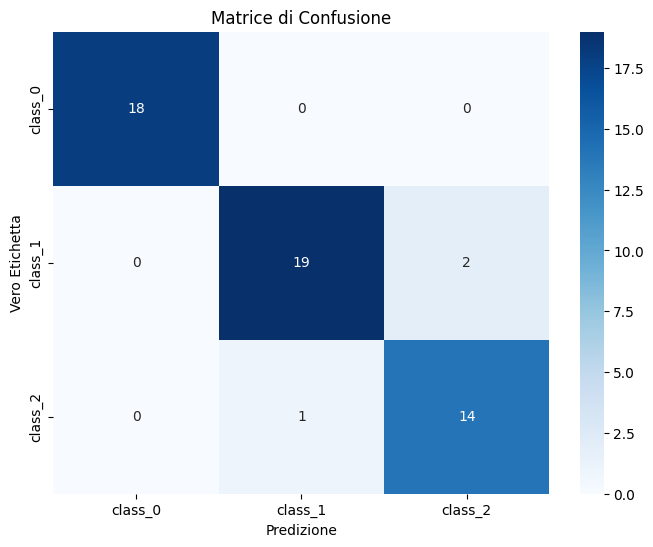

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Matrice di Confusione')
plt.xlabel('Predizione')
plt.ylabel('Vero Etichetta')
plt.show()